## Data Analysis Experiment - Gun Ownership

**Research question:** If every gun in the world was put in a volcano, would the world end?
<p>Gun ownership varies significantly around the world. More than 175 of the world's countries allow their citizens to own firearms—though most have specific regulations on ownership, such as banning certain types of firearms. Mexico, Guatemala, and the United States have gone one step further and made gun ownership a constitutional right. That said, even those countries may place limits on certain types of firearms, such as when the U.S. Supreme Court upheld a temporary ban on certain assault rifles and high-capacity magazines from 1994-2004. On the other hand, civilian ownership of firearms is banned outright in North Korea and Eritrea.
<p>The most recent comprehensive survey of gun ownership worldwide was released in 2017 by the Small Arms Survey, which tallied the number of firearms (registered and unregistered) owned by civilians, the military, and law enforcement agencies for each country in the survey. The results were illuminating, though not entirely surprising for many experts on firearms policy:

*(Data sourced from https://worldpopulationreview.com/country-rankings/gun-ownership-by-country)*

In [16]:
# initilization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# read data from .csv
gun_data = pd.read_csv(r"/Users/simon/Downloads/gun_ownership_2022.csv")

# calculate amount of non-military, non-law enforcement guns
gun_data["privately owned"] = gun_data["firearms"] - gun_data["military"] - gun_data["lawEnf"]

# remove countries with NaN ,reset index after dropping NaN
gun_data = gun_data.dropna().reset_index(drop=True) # new len = 167

print(gun_data.sort_values(by = "per100", ascending = False))

           country   firearms  per100   military     lawEnf     pop2022  \
0    United States  393347000   120.5  4535380.0  1016000.0  334805.269   
2           Serbia    2719000    39.1   384422.0    53100.0    8653.016   
1       Montenegro     245000    39.1     5396.0     8000.0     627.950   
3          Uruguay    1198000    34.7    62130.0    30000.0    3496.016   
4           Canada   12708000    34.7   233949.0   103000.0   38388.419   
..             ...        ...     ...        ...        ...         ...   
163    North Korea      76000     0.3  8363100.0    76000.0   25990.679   
164          Japan     377000     0.3   745514.0   252000.0  125584.838   
165    South Korea      79000     0.2  2688020.0   115000.0   51329.899   
166         Taiwan      10000     0.0  2022150.0    76000.0   23888.595   
167      Indonesia      82000     0.0  1711450.0   429000.0  279134.505   

     privately owned  
0        387795620.0  
2          2281478.0  
1           231604.0  
3      

# Gun Ownership - Data Visualisation

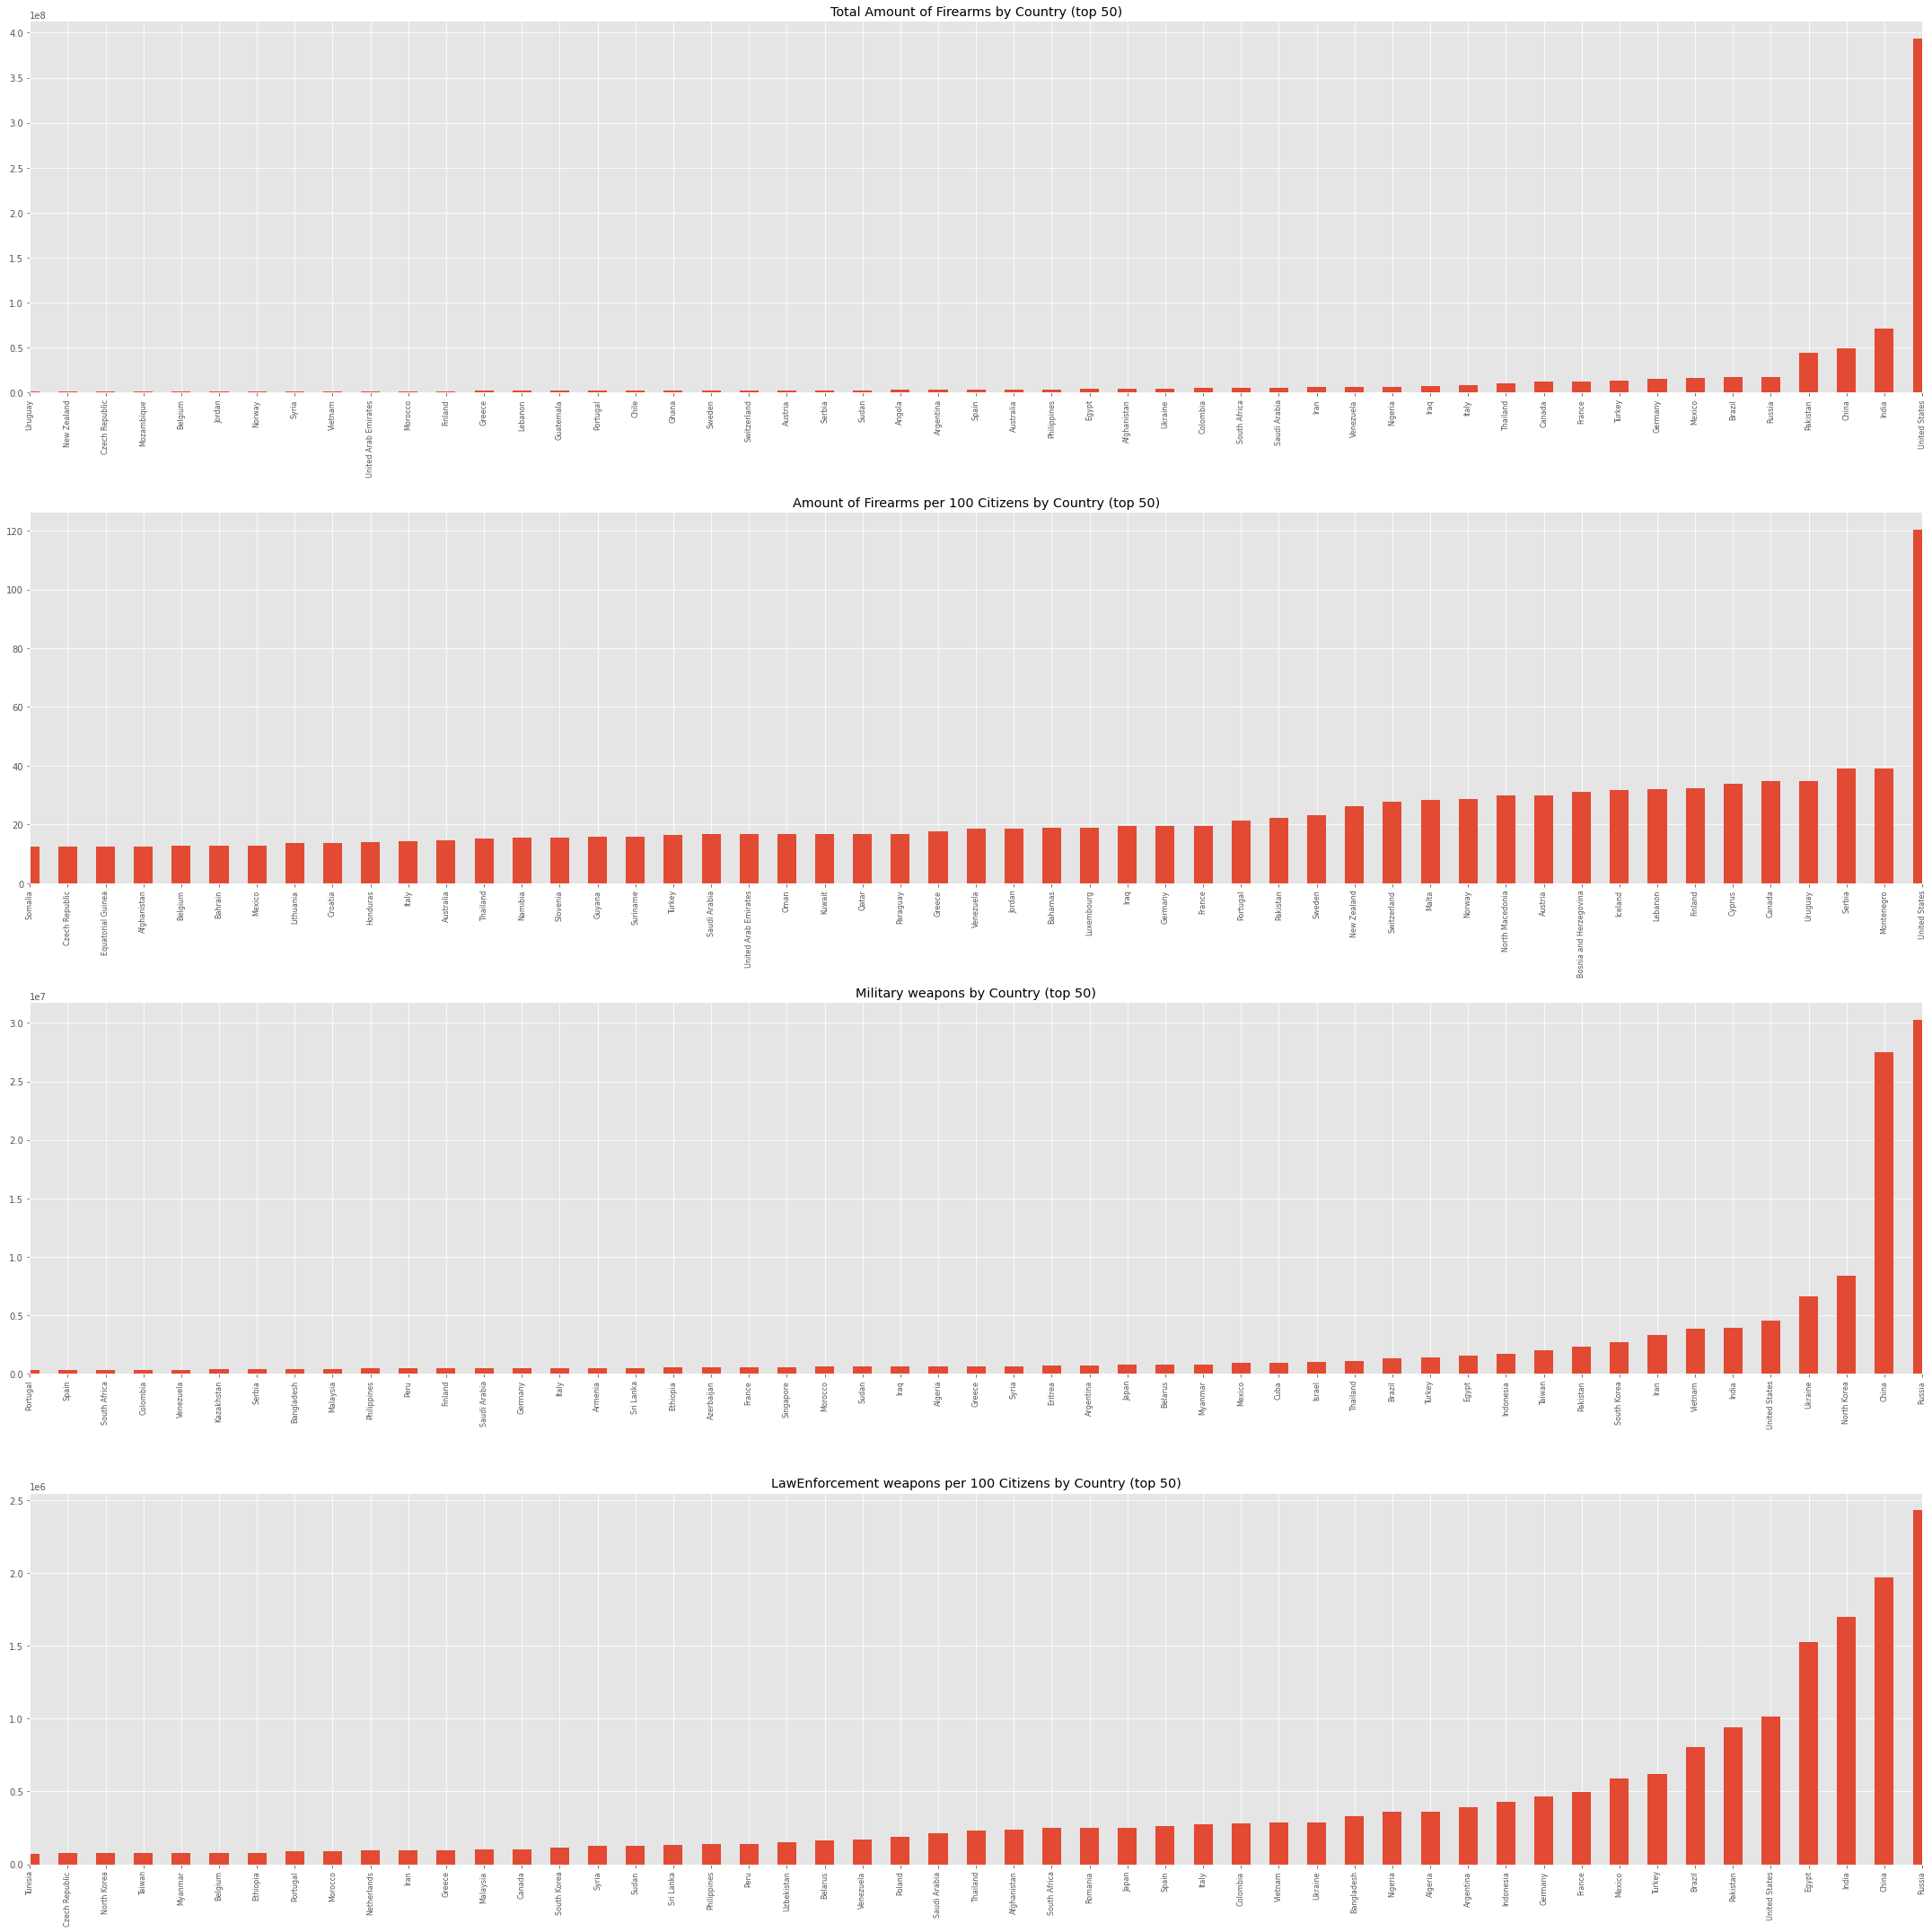

In [23]:
# plot style
plt.style.use('ggplot')

# Create figure object
fig,ax = plt.subplots(nrows=4,
                      figsize = [30,30]
                    )

#fig.suptitle("Gun Ownership in 2022", fontsize = 24)

# Total amount of firearms
plt.sca(ax[0])
gun_data['firearms'].sort_values().plot(kind="bar", title="Total Amount of Firearms by Country (top 50)", xlim = [100,216])
plt.xticks(ticks = range(len(gun_data)),labels = gun_data.sort_values(by = "firearms")["country"],rotation=90, horizontalalignment="center",fontsize = 8)
plt.xlim([117,167])

# firearms per 100 citizens
plt.sca(ax[1])
gun_data['per100'].sort_values().plot(kind="bar", title="Amount of Firearms per 100 Citizens by Country (top 50)")
plt.xticks(ticks = range(len(gun_data)),labels = gun_data.sort_values(by = "per100")["country"],rotation=90, horizontalalignment="center",fontsize = 8)
plt.xlim([117,167])

# weapons owned by military
plt.sca(ax[2])
gun_data['military'].sort_values().plot(kind="bar", title="Military weapons by Country (top 50)")
plt.xticks(ticks = range(len(gun_data)),labels = gun_data.sort_values(by = "military")["country"],rotation=90, horizontalalignment="center",fontsize = 8)
plt.xlim([117,167])

# weapon owned by law enforcement
plt.sca(ax[3])
gun_data['lawEnf'].sort_values().plot(kind="bar", title="LawEnforcement weapons per 100 Citizens by Country (top 50)")
plt.xticks(ticks = range(len(gun_data)),labels = gun_data.sort_values(by = "lawEnf")["country"],rotation=90, horizontalalignment="center",fontsize = 8)
plt.xlim([117,167])

fig.tight_layout()
plt.show()

                 military     lawEnf  privately owned
country                                              
United States   4535380.0  1016000.0      387795620.0
Sweden           139180.0    38000.0        2118820.0
China          27466400.0  1971000.0       20297600.0


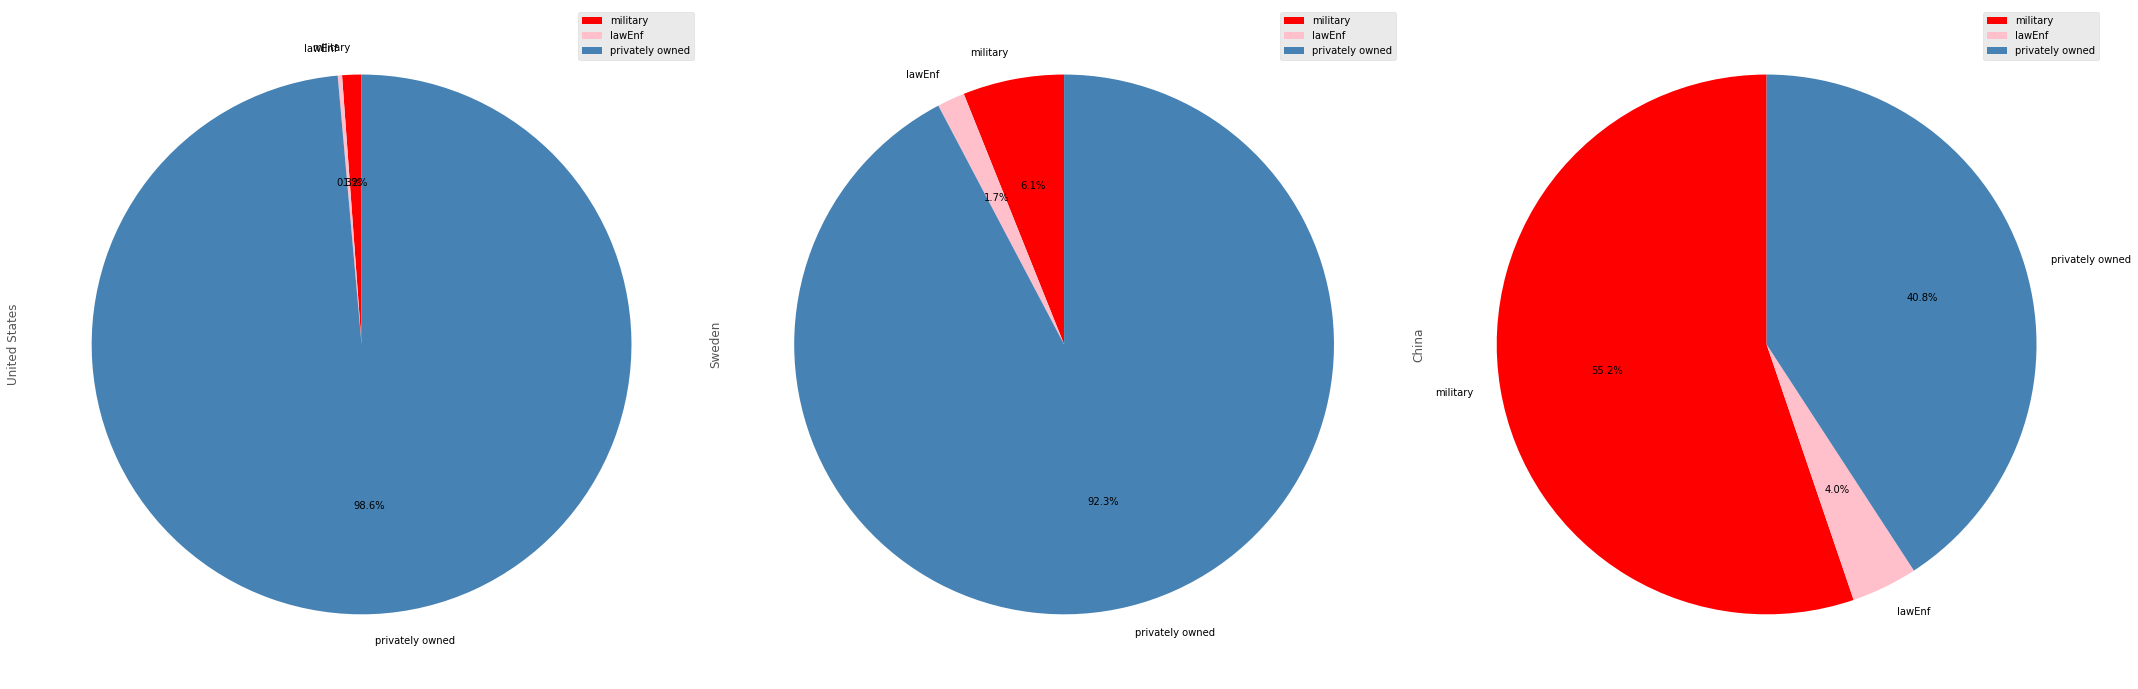

In [76]:
# pie chart of US vs Sweden
df_pie = pd.concat([gun_data.loc[gun_data['country'] == "United States"],
                    gun_data.loc[gun_data['country'] == "Sweden"],
                    gun_data.loc[gun_data['country'] == "China"],],
                    ignore_index= True)

# remove unused data and set country as index
df_pie = df_pie.drop(labels =["firearms","per100","pop2022"],axis=1).set_index("country")


print(df_pie)

df_pie.T.plot(kind = "pie",
              autopct = '%1.1f%%', 
              startangle = 90, 
              subplots = True, 
              colors = ['red', 'pink', 'steelblue'],
              figsize = (30,20),
              )

plt.tight_layout()
ax[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Calculation of Total amount of Guns

In [101]:
# how many guns are there in the world?
n_guns = gun_data["firearms"].sum() # 833_631_000, ~ 8 * 10^9

# according to quick google an AK47 (most common gun) weighs: 

"""
Without magazine:
3.47 kg (7.7 lb)

4.3kg loaded

Magazine, empty:
0.43 kg (0.95 lb) (early issue)[6]
0.33 kg (0.73 lb) (steel)[7]
0.25 kg (0.55 lb) (plastic)[8]
0.17 kg (0.37 lb) (light alloy)[7]
"""

# approximate weight of a gun, loaded AK-47
m_gun = 4.3 # kg

# mass of all guns combined
m_guns = n_guns * m_gun # weight of all guns in the world, in kg

# carbon content of all guns according to google

"""
The carbon content of steel is between 0.002% and 2.14% by weight for plain carbon steel (iron-carbon alloys). Too little carbon content leaves (pure) iron quite soft, ductile, and weak. Carbon contents higher than those of steel make a brittle alloy commonly called pig iron.
"""

# Carbon content between 0.002% - 2.14% in steel
percent_carbon = [i * 10 **-2 for i in [0.002, 2.14]]

# mass of carbon in all guns combined
m_carbon = [i * m_guns for i in percent_carbon]

# print results
print(f"The amount of total carbon in all guns is between {'{:.2e}'.format(m_carbon[0]/1000)} - {'{:.2e}'.format(m_carbon[1]/1000)} tons.")

# comparison to CO2 emissions 

"""
Global energy-related carbon dioxide emissions rose by 6% in 2021 to 36.3 billion tonnes, their highest ever level, as the world economy rebounded strongly from the Covid-19 crisis and relied heavily on coal to power that growth, according to new IEA analysis released today.8 Mar 2022
"""

global_energy_CO2_emission = 36.3 * 10 ** 9 # tons CO2

# molecular weight of carbon dioxide
mw_CO2 =  44.01 # g/mol

# amount of CO2 molecules released in energy production 2021
n_CO2 = global_energy_CO2_emission * 10 ** 6 / 44.01 # mol

# weight of carbon atoms released
m_carbon_emission = n_CO2 * 12.011 * 10 **-6 # tons

# calculate mean
def Mean(lst):
    return sum(lst) / len(lst)


# print results
print(f"for Comparison, the amount of carbon released in energy production in 2021 is {'{:.2e}'.format(m_carbon_emission)} tons, which is ~ {'{:.2e}'.format(m_carbon_emission/(Mean(m_carbon)/1000))} times larger")







The amount of total carbon in all guns are between 7.17e+01 - 7.67e+04 tons.
for Comparison, the amount of carbon released in energy production in 2021 is 9.91e+09 tons, which is ~ 2.58e+05 times larger
